# Graveyard Of Wikidata - Cluster

Github : https://github.com/haikelJebahi/Graveyard-of-wikidata

Data : https://iccl.inf.tu-dresden.de/web/Wikidata_SPARQL_Logs/en

## Imports

In [ ]:
%matplotlib inline
from joblib import dump, load
import pandas as pd
import matplotlib.pyplot as plt
import re
from urllib.parse import unquote_plus
from collections import Counter
import seaborn as sns
from sklearn.cluster import KMeans
import colorcet as cc
from sklearn.cluster import AgglomerativeClustering
from pandas.plotting import parallel_coordinates
import scipy
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns
from sklearn.manifold import TSNE
#import Query2Vec

In [ ]:
pd.set_option("display.max_rows", 100, "display.max_columns", None)
pd.set_option("display.expand_frame_repr", True)
pd.set_option("display.max_colwidth", -1)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# see parse.py
def encoded2raw(encoded):
    str = unquote_plus(encoded)
    str = re.sub(r"> *\*", ">*", str)
    str = re.sub(r"> *\+", ">+", str)
    str = re.sub(r"> *\?([^v])", r">?\1", str)
    return str


## Analyse with PCA/TSNE

In [ ]:
df_sample = pd.read_csv("../data/sample/status500_Joined.parsed.noduplicate.sample.tsv", sep="\t")
tsne_2_results = load("../data/tsne/tsne.noduplicate.joblib")


In [ ]:

features = ["cycleNumber","isForest","numberOfNodes", "numberOfEdges","treewidth","isTree","averageDegree","maxCliqueWeigth"]

In [ ]:
df_sample

anonymizedQuery  \
0      SELECT+DISTINCT+%3Fvar1++%3Fvar1Label+%0AWHERE+%7B%0A++%3Fvar1+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP31%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP279%3E+*%29+%3Fvar2+.%0A+SERVICE++%3Chttp%3A%2F%2Fwikiba.se%2Fontology%23label%3E+++%7B%0A++++%3Chttp%3A%2F%2Fwww.bigdata.com%2Frdf%23serviceParam%3E++%3Chttp%3A%2F%2Fwikiba.se%2Fontology%23language%3E++%22en%22.%0A++%7D%0A%7D%0ALIMIT+10%0A                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1      SELECT+DISTINCT+%3Fvar1+%0AWHERE+%7B%0A++%3Fvar1+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP31%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP279%3E+*%29+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ43229%3E+%3B%0A+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP625%3E++%5B%5D+%3B%0A+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP159%3E++%5B%5D+.%0A++MINUS+++%7B%0A++++%3Fvar1+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2FP159%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fqualifier%2FP625%3E+%29+%5B%5D+.%0A++%7D%0A++MINUS+++%7B%0A++++%3Fvar1+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP31%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP279%3E+*%29+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ2221906%3E+.%0A++%7D%0A++MINUS+++%7B%0A++++%3Fvar1+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP31%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP279%3E+*%29+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ618123%3E+.%0A++%7D%0A%7D%0ALIMIT+100%0A                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
2      SELECT+%3Fvar1Label++%3Fvar2+%28++YEAR+%28++%3Fvar3++%29++AS++%3Fvar4++%29%0AWHERE+%7B%0A++BIND+%28++MONTH+%28++NOW+%28++%29++%29++AS++%3Fvar5+%29.%0A++BIND+%28++DAY+%28++NOW+%28++%29++%29++AS++%3Fvar6+%29.%0A++%3Fvar1++%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP570%3E++%3Fvar3+.%0A+SERVICE++%3Chttp%3A%2F%2Fwikiba.se%2Fontology%23label%3E+++%7B%0A++++%3Chttp%3A%2F%2Fwww.bigdata.com%2Frdf%23serviceParam%3E++%3Chttp%3A%2F%2Fwikiba.se%2Fontology%23language%3E++%22en%22.%0A++%7D%0A+OPTIONAL+%7B%0A++%3Fvar7++%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP106%3E++%3Fvar2+.%0A+%7D%0A+FILTER+%28++%28+%28++MONTH+%28++%3Fvar3++%29++%3D++%3Fvar5++%29+%26%26+%28++DAY+%28++%3Fvar3++%29++%3D++%3Fvar6++%29+%29+%0A%29+.%0A%7D%0ALIMIT+10%0A                                                                                                                   

In [ ]:
features

['cycleNumber',
 'isForest',
 'numberOfNodes',
 'numberOfEdges',
 'treewidth',
 'isTree',
 'averageDegree',
 'maxCliqueWeigth']

## TNSE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=42)
df_features = df_sample[features]
tsne_2_results = tsne.fit_transform(df_features)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 42131 samples in 0.066s...
[t-SNE] Computed neighbors for 42131 samples in 3.200s...
[t-SNE] Computed conditional probabilities for sample 1000 / 42131
[t-SNE] Computed conditional probabilities for sample 2000 / 42131
[t-SNE] Computed conditional probabilities for sample 3000 / 42131
[t-SNE] Computed conditional probabilities for sample 4000 / 42131
[t-SNE] Computed conditional probabilities for sample 5000 / 42131
[t-SNE] Computed conditional probabilities for sample 6000 / 42131
[t-SNE] Computed conditional probabilities for sample 7000 / 42131

### Kmeans clustering

In [ ]:
kmeans = dict()
distortions = []

for i in range(1,20):
    print("Clustering for n_clusters=" + str(i))
    kmeans[i] = KMeans(n_clusters=i, random_state=0).fit(tsne_2_results)
    distortions.append(kmeans[i].inertia_)


Clustering for n_clusters=1
Clustering for n_clusters=2
Clustering for n_clusters=3
Clustering for n_clusters=4
Clustering for n_clusters=5
Clustering for n_clusters=6
Clustering for n_clusters=7
Clustering for n_clusters=8
Clustering for n_clusters=9
Clustering for n_clusters=10
Clustering for n_clusters=11
Clustering for n_clusters=12
Clustering for n_clusters=13
Clustering for n_clusters=14
Clustering for n_clusters=15
Clustering for n_clusters=16
Clustering for n_clusters=17
Clustering for n_clusters=18
Clustering for n_clusters=19


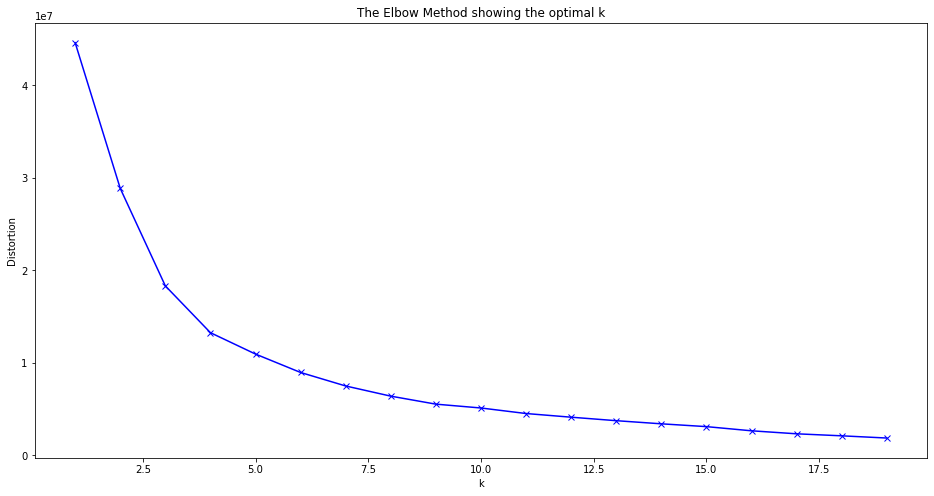

In [ ]:

plt.figure(figsize=(16,8))
plt.plot(kmeans.keys(), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

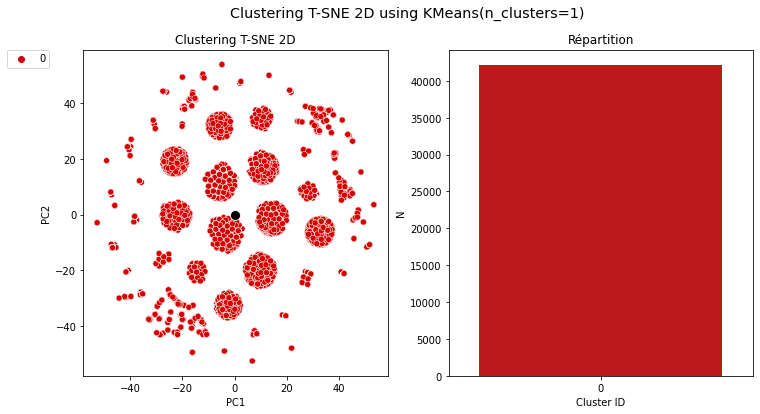

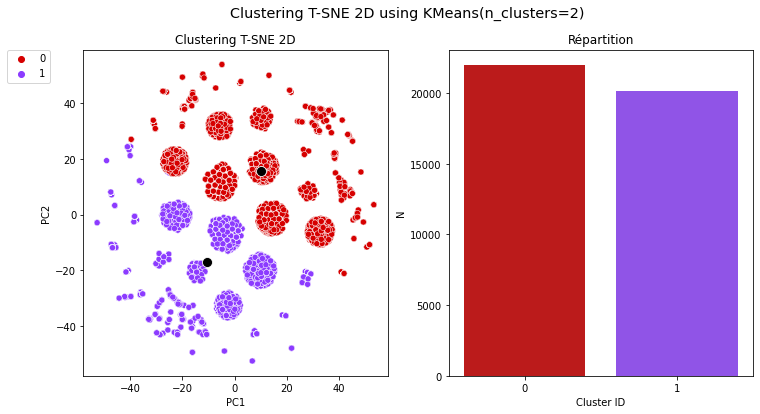

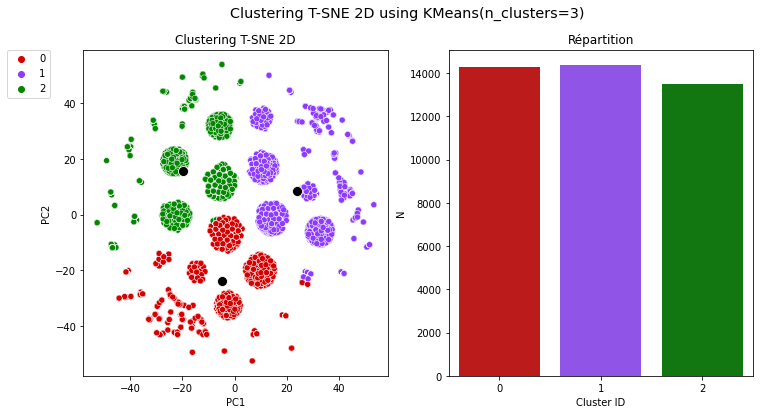

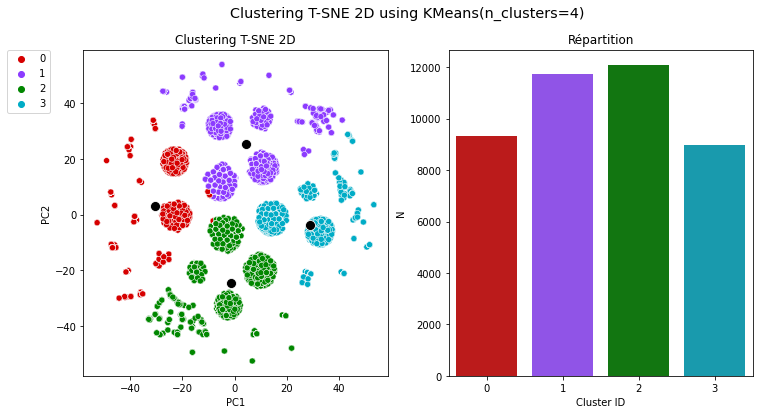

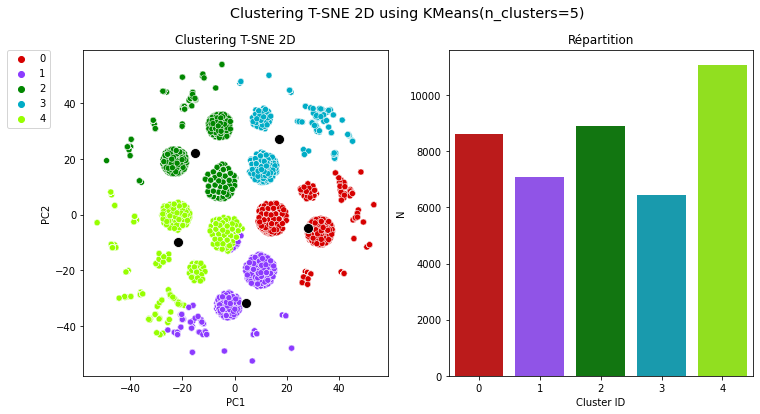

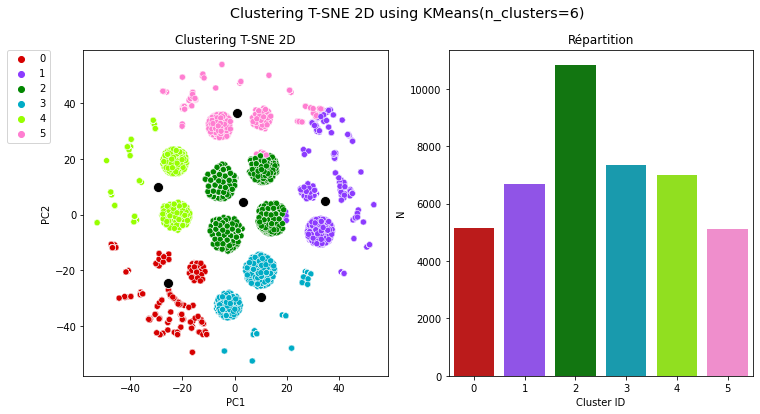

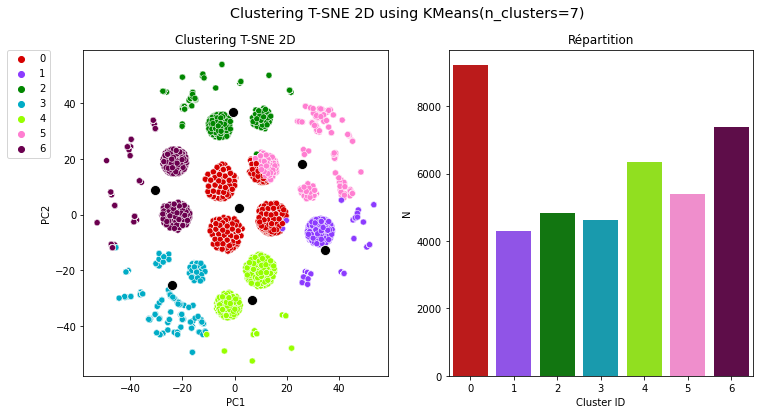

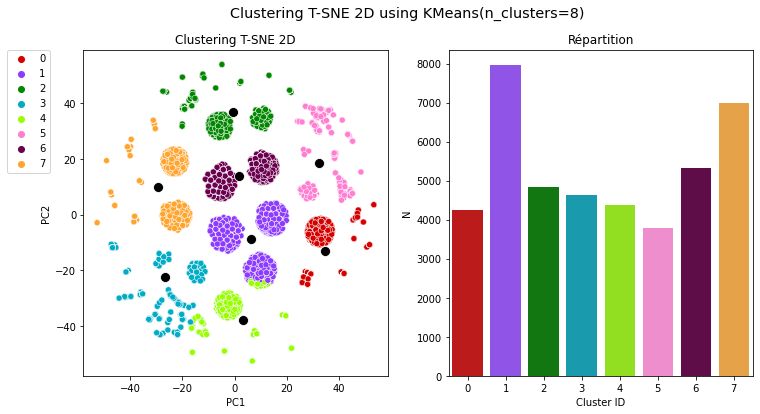

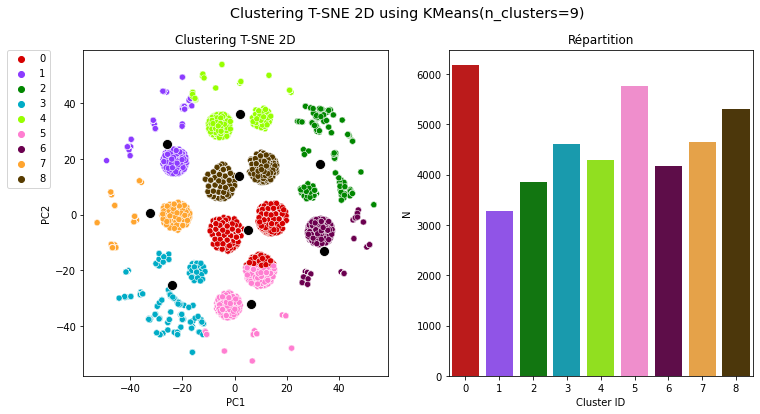

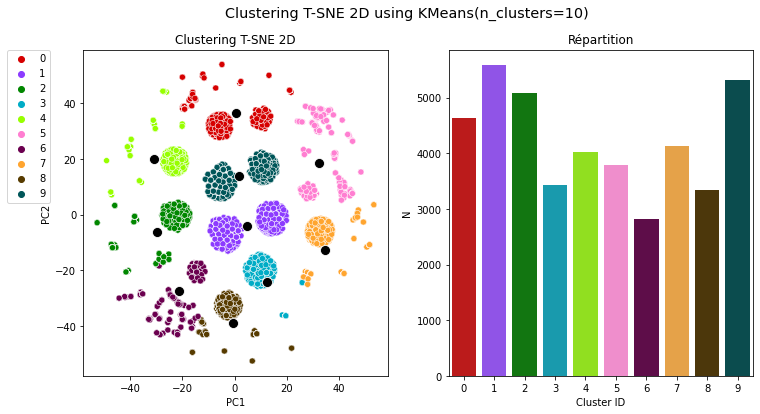

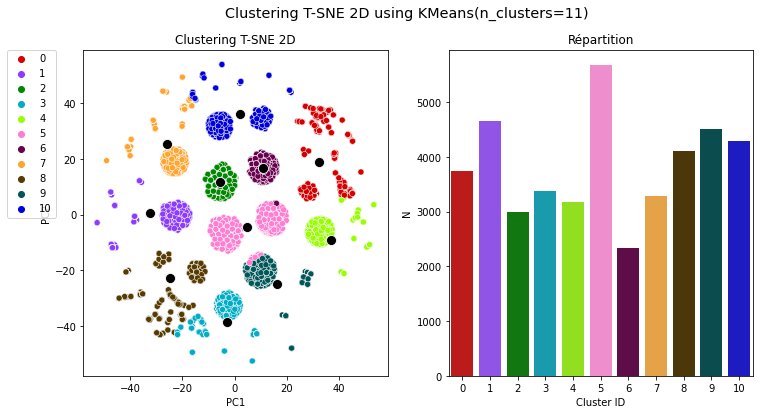

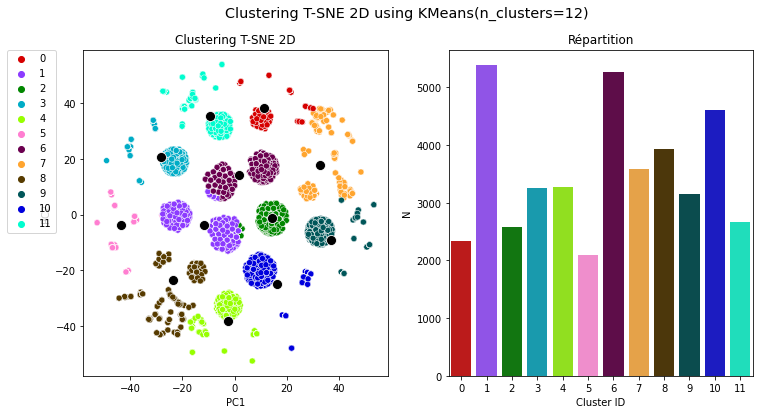

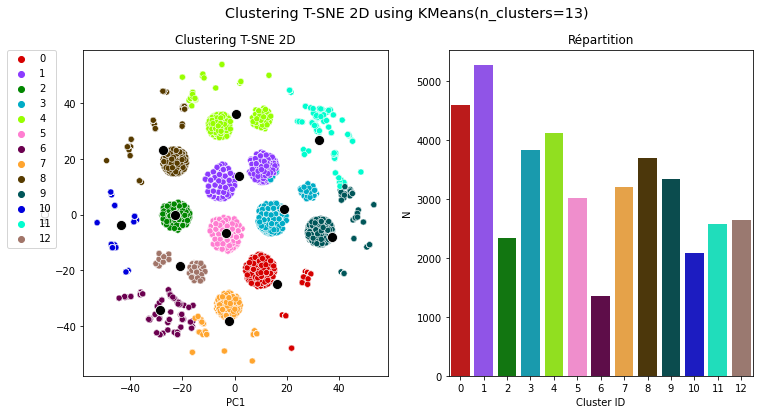

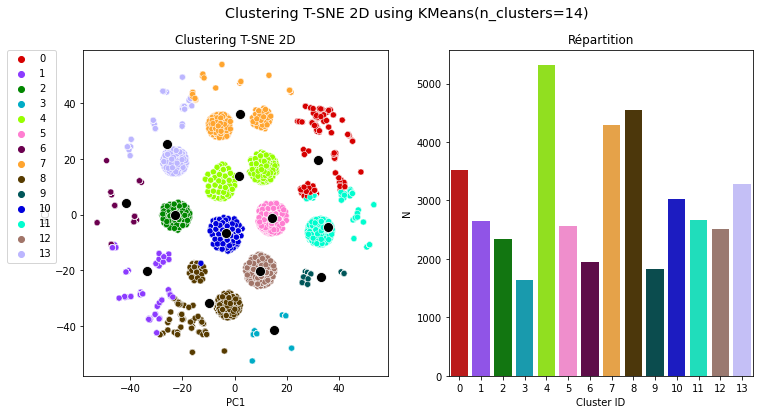

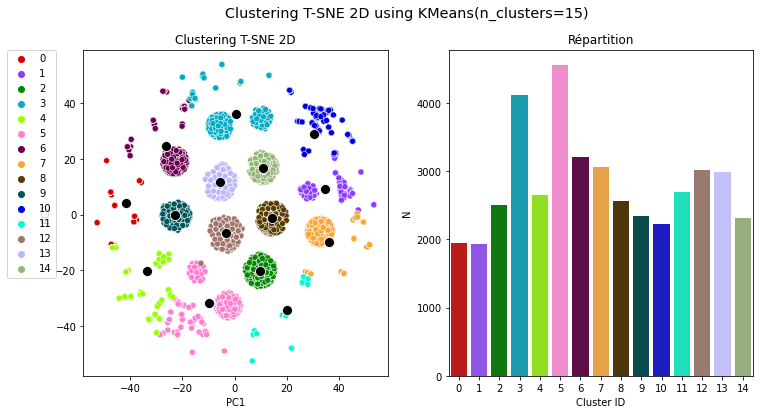

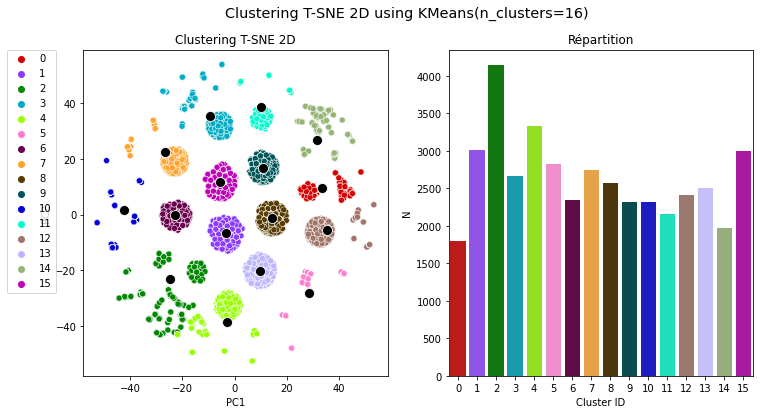

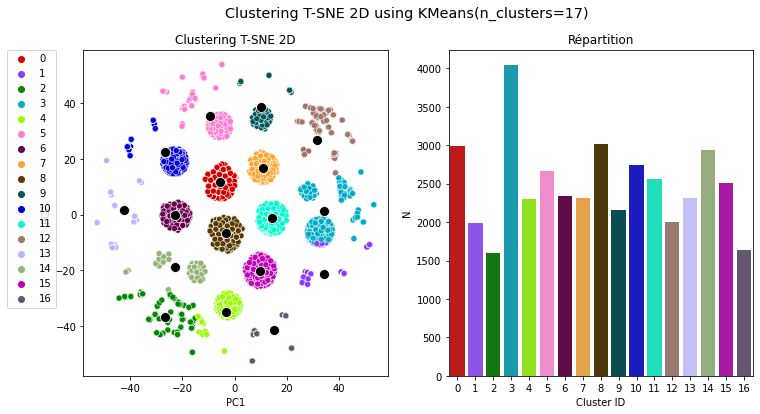

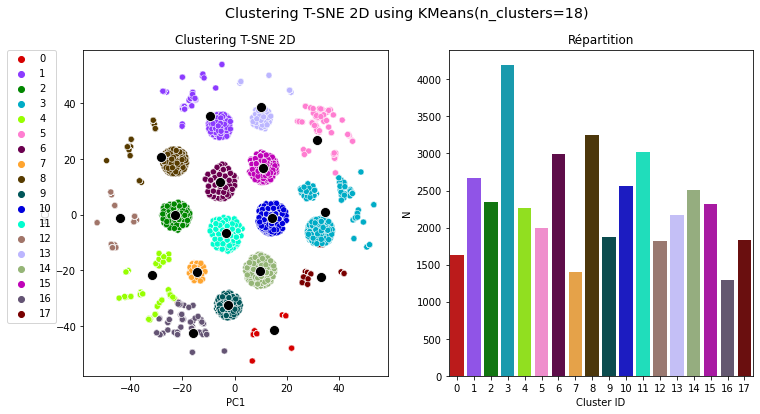

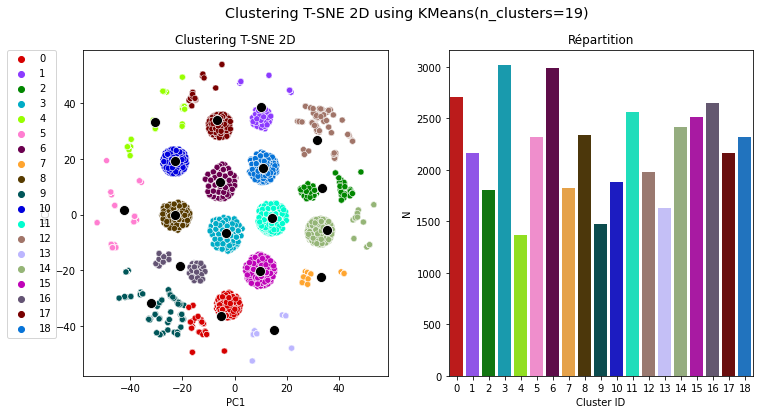

In [ ]:
for keys in kmeans.keys():
    labels = kmeans[keys].labels_
    counter = Counter(labels) #donne le nombre de query par cluster (collections)

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    # Plot title
    st = fig.suptitle("Clustering T-SNE 2D using KMeans(n_clusters=" + str(keys) + ")", fontsize="x-large")
    palette = sns.color_palette(cc.glasbey, n_colors=len(counter.keys()))

    # Scatterplot
    sns\
        .scatterplot(x=tsne_2_results[:, 0], y=tsne_2_results[:, 1], hue=labels.astype(int), ax=ax1,legend='full', palette=palette)\
        .set(title="Clustering T-SNE 2D", xlabel="PC1", ylabel="PC2")

    sns\
        .scatterplot(
            x=kmeans[keys].cluster_centers_[:, 0], 
            y=kmeans[keys].cluster_centers_[:, 1], 
            ax = ax1, 
            color='black', 
            s=100
            )
    ax1.legend(bbox_to_anchor=(-0.25, 1), loc=2, borderaxespad=0.)

    # Bar plot
    sns\
        .barplot(x=list(counter.keys()), y=list(counter.values()), ax=ax2,  palette=palette)\
        .set(title="Répartition", xlabel="Cluster ID", ylabel="N")
    
    # show
    plt.show()

### Analyse with n=10

Add cluster to dataframe

In [ ]:
labels = kmeans[10].labels_ # <-- change me

df_sample_with_cluster = df_sample.copy()
df_sample_with_cluster["cluster_id"] = labels
df_sample_with_cluster

anonymizedQuery  \
0      SELECT+DISTINCT+%3Fvar1++%3Fvar1Label+%0AWHERE+%7B%0A++%3Fvar1+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP31%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP279%3E+*%29+%3Fvar2+.%0A+SERVICE++%3Chttp%3A%2F%2Fwikiba.se%2Fontology%23label%3E+++%7B%0A++++%3Chttp%3A%2F%2Fwww.bigdata.com%2Frdf%23serviceParam%3E++%3Chttp%3A%2F%2Fwikiba.se%2Fontology%23language%3E++%22en%22.%0A++%7D%0A%7D%0ALIMIT+10%0A                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1      SELECT+DISTINCT+%3Fvar1+%0AWHERE+%7B%0A++%3Fvar1+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP31%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP279%3E+*%29+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ43229%3E+%3B%0A+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP625%3E++%5B%5D+%3B%0A+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP159%3E++%5B%5D+.%0A++MINUS+++%7B%0A++++%3Fvar1+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2FP159%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fqualifier%2FP625%3E+%29+%5B%5D+.%0A++%7D%0A++MINUS+++%7B%0A++++%3Fvar1+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP31%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP279%3E+*%29+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ2221906%3E+.%0A++%7D%0A++MINUS+++%7B%0A++++%3Fvar1+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP31%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP279%3E+*%29+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ618123%3E+.%0A++%7D%0A%7D%0ALIMIT+100%0A                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
2      SELECT+%3Fvar1Label++%3Fvar2+%28++YEAR+%28++%3Fvar3++%29++AS++%3Fvar4++%29%0AWHERE+%7B%0A++BIND+%28++MONTH+%28++NOW+%28++%29++%29++AS++%3Fvar5+%29.%0A++BIND+%28++DAY+%28++NOW+%28++%29++%29++AS++%3Fvar6+%29.%0A++%3Fvar1++%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP570%3E++%3Fvar3+.%0A+SERVICE++%3Chttp%3A%2F%2Fwikiba.se%2Fontology%23label%3E+++%7B%0A++++%3Chttp%3A%2F%2Fwww.bigdata.com%2Frdf%23serviceParam%3E++%3Chttp%3A%2F%2Fwikiba.se%2Fontology%23language%3E++%22en%22.%0A++%7D%0A+OPTIONAL+%7B%0A++%3Fvar7++%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP106%3E++%3Fvar2+.%0A+%7D%0A+FILTER+%28++%28+%28++MONTH+%28++%3Fvar3++%29++%3D++%3Fvar5++%29+%26%26+%28++DAY+%28++%3Fvar3++%29++%3D++%3Fvar6++%29+%29+%0A%29+.%0A%7D%0ALIMIT+10%0A                                                                                                                   

Calculate distances to centroid

In [ ]:
distances = []
for i in range(0,len(df_sample_with_cluster)):
    if i % 1000 == 0:
        print(i,"/",len(df_sample_with_cluster))

    point = tsne_2_results[i]
    cluster_id = df_sample_with_cluster.iloc[i]["cluster_id"]
    centroid = kmeans[max(df_sample_with_cluster["cluster_id"]) + 1].cluster_centers_[cluster_id]
    distance = scipy.spatial.distance.euclidean(point,centroid)
    distances.append(distance)


df_sample_with_cluster["distance_center_cluster"] = distances

0 / 42131
1000 / 42131
2000 / 42131
3000 / 42131
4000 / 42131
5000 / 42131
6000 / 42131
7000 / 42131
8000 / 42131
9000 / 42131
10000 / 42131
11000 / 42131
12000 / 42131
13000 / 42131
14000 / 42131
15000 / 42131
16000 / 42131
17000 / 42131
18000 / 42131
19000 / 42131
20000 / 42131
21000 / 42131
22000 / 42131
23000 / 42131
24000 / 42131
25000 / 42131
26000 / 42131
27000 / 42131
28000 / 42131
29000 / 42131
30000 / 42131
31000 / 42131
32000 / 42131
33000 / 42131
34000 / 42131
35000 / 42131
36000 / 42131
37000 / 42131
38000 / 42131
39000 / 42131
40000 / 42131
41000 / 42131
42000 / 42131


##### Per query

group by cluster

In [ ]:
dict_df_by_cluster = dict()
cluster_ids = df_sample_with_cluster["cluster_id"].unique()

for cluster_id in cluster_ids:
    dict_df_by_cluster[cluster_id] = df_sample_with_cluster[df_sample_with_cluster["cluster_id"]==cluster_id]

In [ ]:
n_query_per_cluster = 2

for cluster_id in dict_df_by_cluster.keys():
    subset = dict_df_by_cluster[cluster_id].sample(n=n_query_per_cluster, random_state=0, replace=True)
    for index, row in subset.iterrows():
        print("Cluster ID  = " + str(cluster_id) + ", index = " + str(index))
        print("---- QUERY BEGIN ----")
        print(encoded2raw(row["anonymizedQuery"]))
        print("---- QUERY END ----")
        print()

Cluster ID  = 2, index = 22549
---- QUERY BEGIN ----
SELECT DISTINCT ?var1 
WHERE {
 OPTIONAL {
  ?var1  <http://www.wikidata.org/prop/direct/P1157>  ?var2 .
  ?var2  <http://www.w3.org/2000/01/rdf-schema#label>  ?var2Label .
 FILTER (  ( (  LCASE (  STR (  ?var2Label  )  )  =  "p000449" ) ) 
) .
 }
 OPTIONAL {
  ?var1  <http://www.wikidata.org/prop/direct/P2002>  ?var3 .
  ?var3  <http://www.w3.org/2000/01/rdf-schema#label>  ?var3Label .
 FILTER (  ( (  LCASE (  STR (  ?var3Label  )  )  =  "string1" ) ) 
) .
 }
 OPTIONAL {
  ?var1  <http://www.wikidata.org/prop/direct/P2013>  ?var4 .
  ?var4  <http://www.w3.org/2000/01/rdf-schema#label>  ?var4Label .
 FILTER (  ( (  LCASE (  STR (  ?var4Label  )  )  =  "string1" ) ) 
) .
 }
 OPTIONAL {
  ?var1  <http://www.wikidata.org/prop/direct/P4300>  ?var5 .
  ?var5  <http://www.w3.org/2000/01/rdf-schema#label>  ?var5Label .
 FILTER (  ( (  LCASE (  STR (  ?var5Label  )  )  =  "string1" ) ) 
) .
 }
 FILTER (  (  BOUND (  ?var2  )  ||  BOUND (  ?v

### Parallel Coordinates Plot

##### Plot

Calculate color palette

In [ ]:
n_colors = df_sample_with_cluster["cluster_id"].max() + 1
palette = sns.color_palette(cc.glasbey, n_colors=n_colors)

Plot

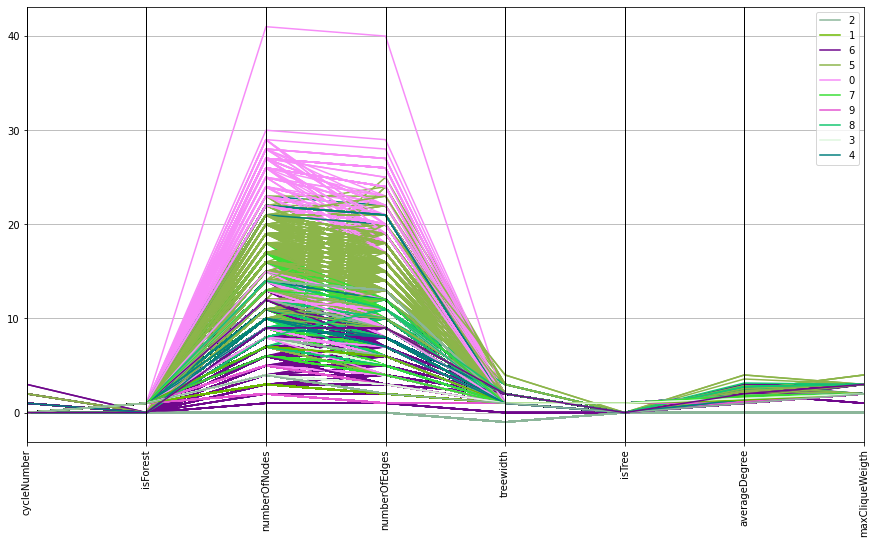

In [ ]:
plt.figure(figsize=(15, 8))
pd.plotting.parallel_coordinates(
    df_sample_with_cluster[
        features
        + ["cluster_id"]
    ],
    "cluster_id",
)
plt.xticks(rotation=90)
plt.show()


### Parallel Coordinates Plot for the Clusters

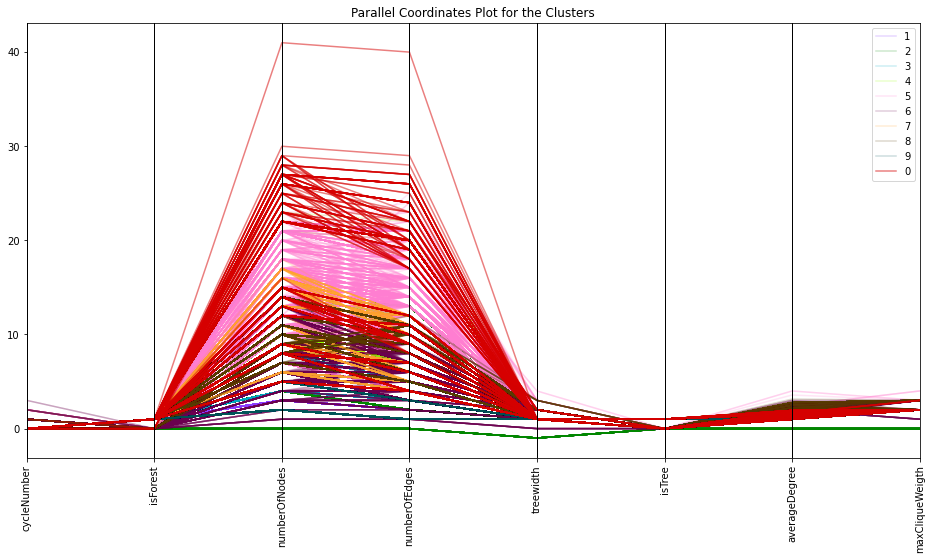

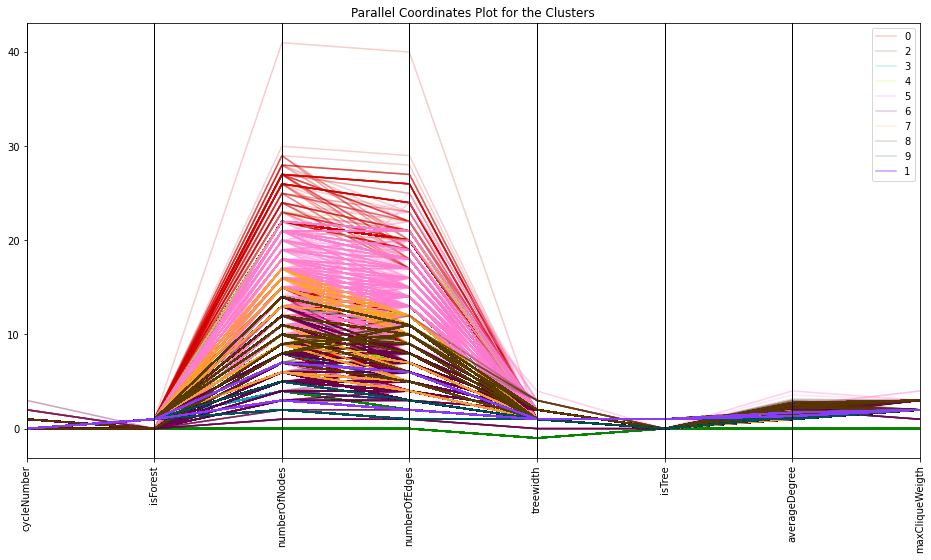

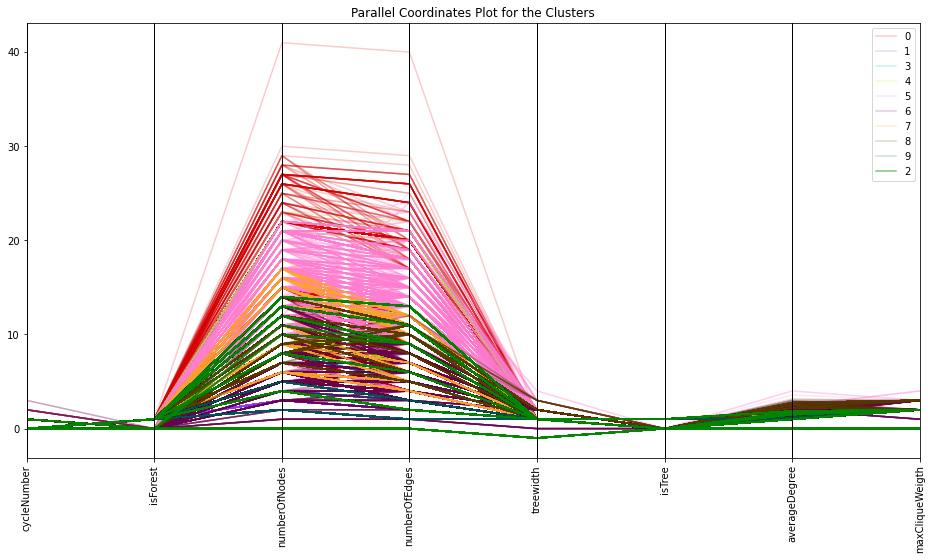

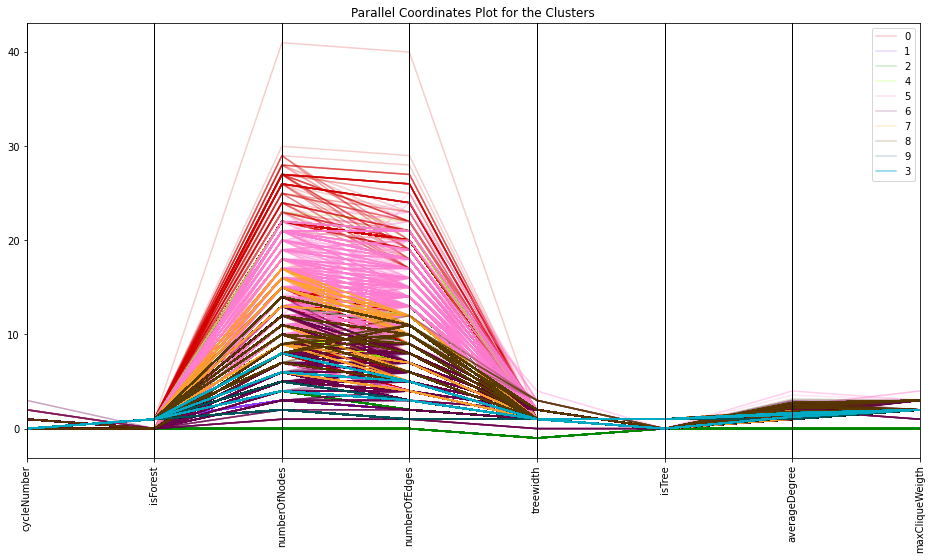

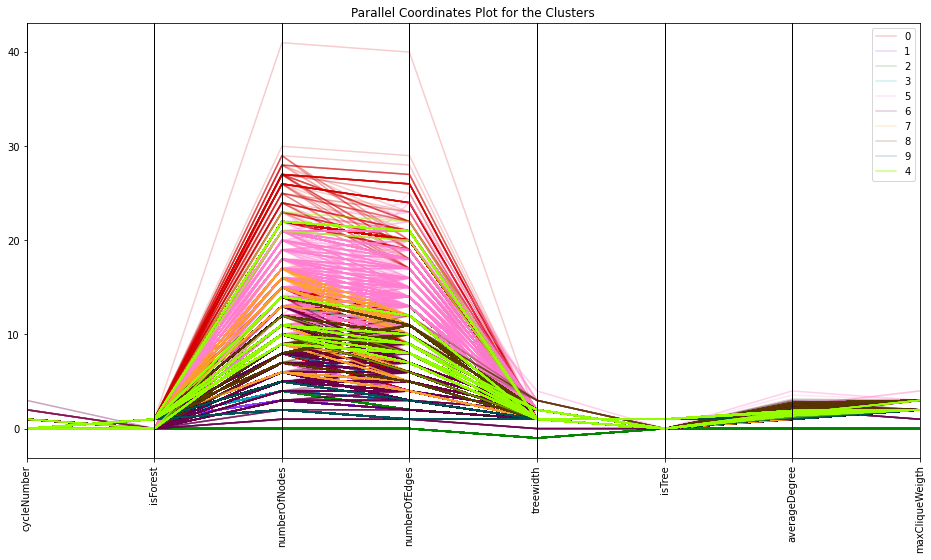

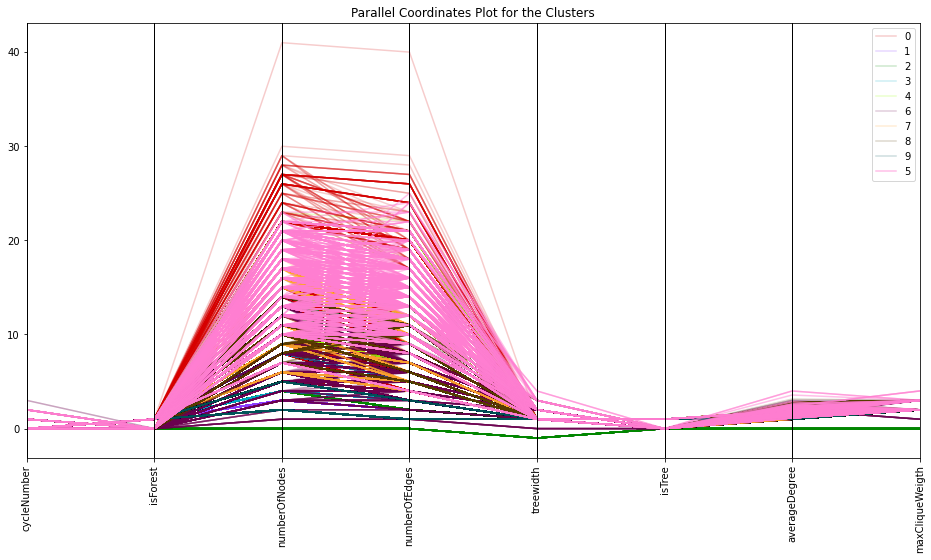

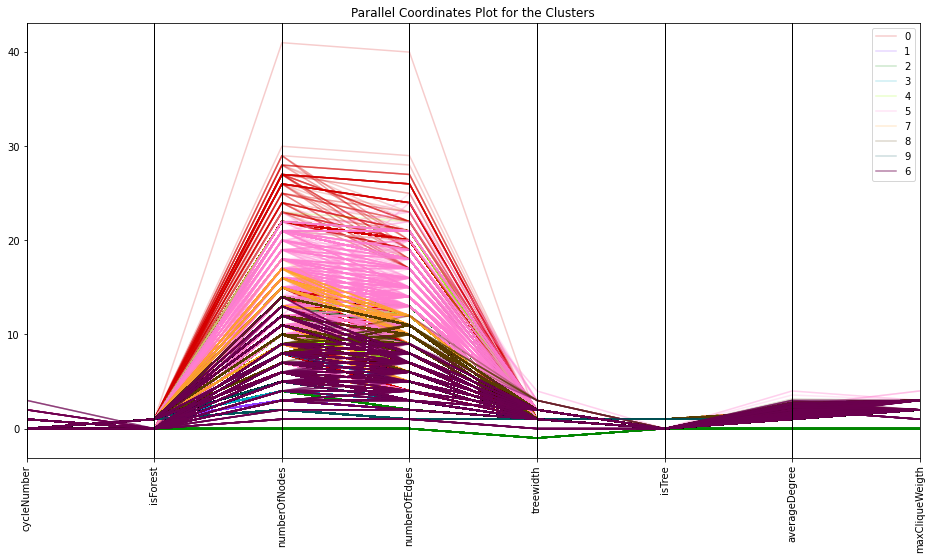

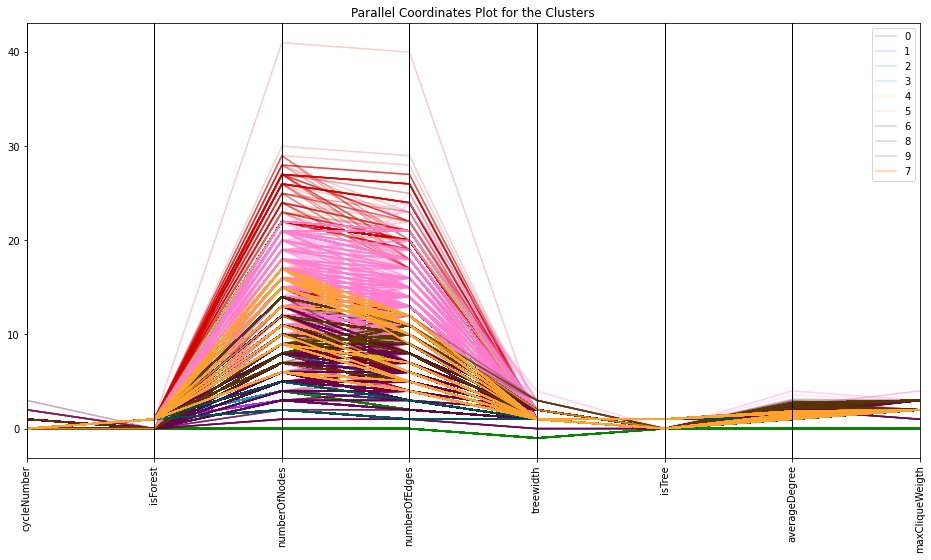

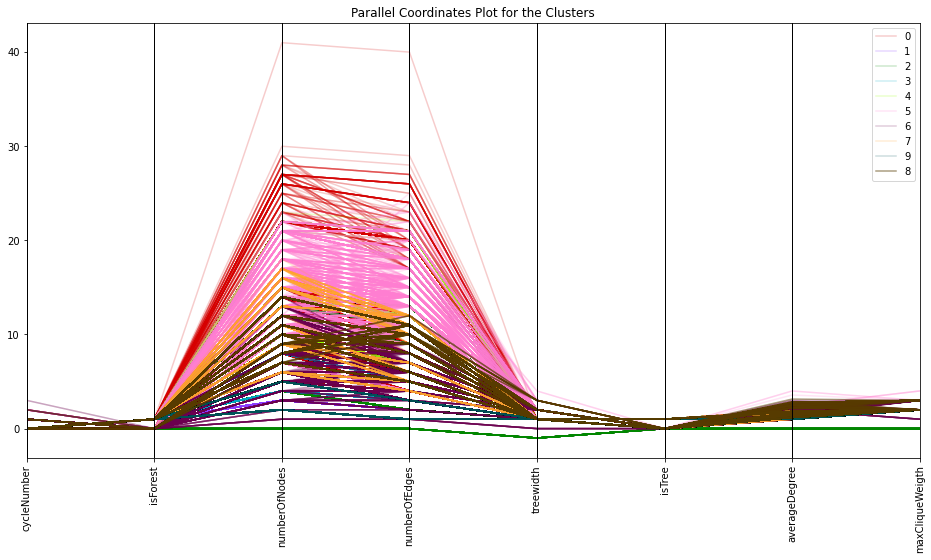

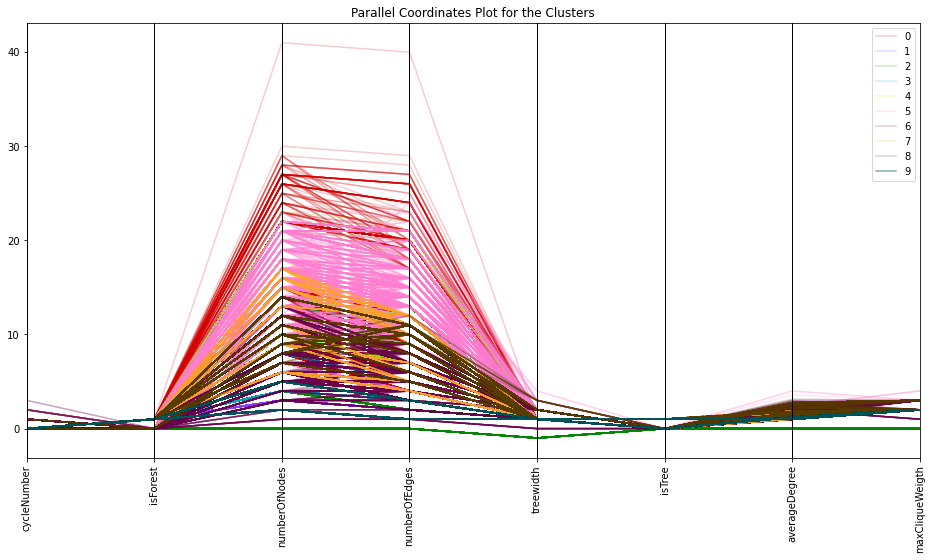

In [ ]:
def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''

    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster_id==i])

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):
        plt.figure(figsize=(16, 8))
        plt.title("Parallel Coordinates Plot for the Clusters")
        plt.xticks(rotation=90)
        for j,c in enumerate(cluster_points):
            if i!= j:
                pc = parallel_coordinates(c, 'cluster_id', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster_id', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()

        plt.show()


display_parallel_coordinates( df_sample_with_cluster[
        features
        + ["cluster_id"]
    ], max(df_sample_with_cluster["cluster_id"]) + 1)

In [ ]:
df_sample_with_cluster[df_sample_with_cluster["cluster_id"] == 2].sort_values(by=['distance_center_cluster']).iloc[0]

anonymizedQuery                 SELECT+DISTINCT+%3Fvar1+%28+COUNT+%28+%3Fvar1++%29+AS++%3Fvar2++%29%0AWHERE+%7B%0A++%3Fvar3++%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP1741%3E++%3Fvar4+.%0A+OPTIONAL+%7B%0A++%3Fvar5++%3Fvar1++%3Fvar6+.%0A+%7D%0A%7D%0AGROUP+BY++%3Fvar1+%0AORDER+BY++DESC%28+%3Fvar2+%29%0ALIMIT+5%0A                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

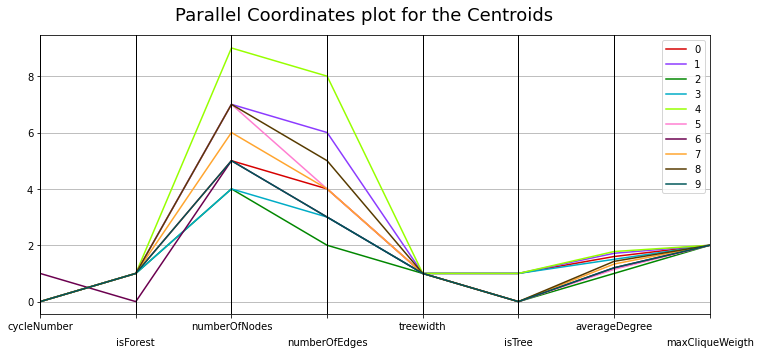

In [ ]:
def display_parallel_coordinates_centroids():
    num_clusters = max(df_sample_with_cluster["cluster_id"]) + 1
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    
    tab = []
    for i in range(0,num_clusters):
        tab.append( df_sample_with_cluster[df_sample_with_cluster["cluster_id"] == i].sort_values(by=['distance_center_cluster']).iloc[0][features + ["cluster_id"]])
        
    
    centroids = pd.DataFrame(tab)

    # Draw the chart
    parallel_coordinates(centroids, 'cluster_id',color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20) 



display_parallel_coordinates_centroids()


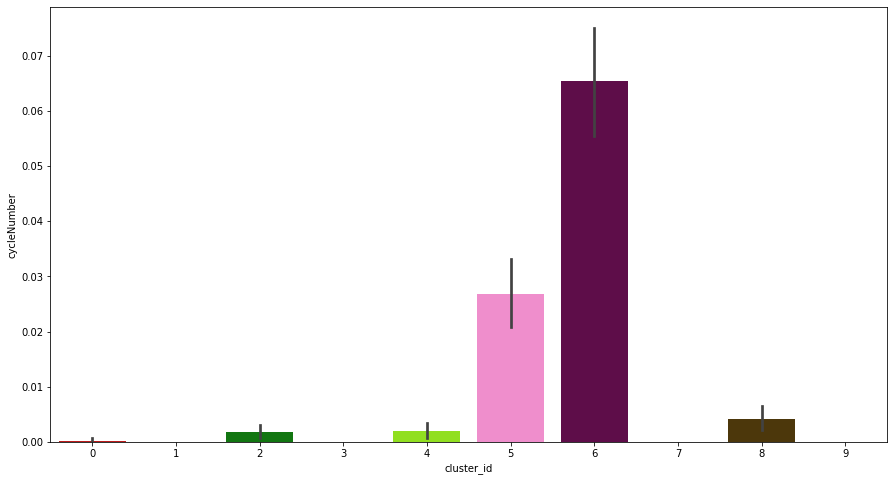

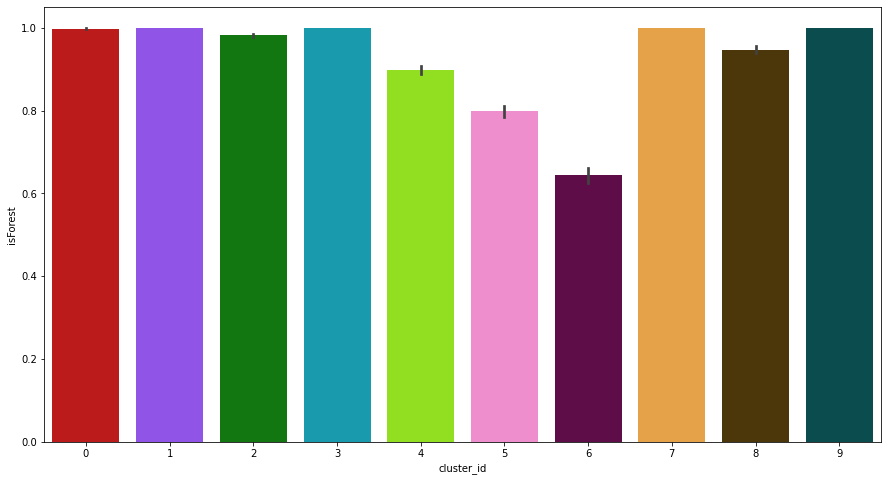

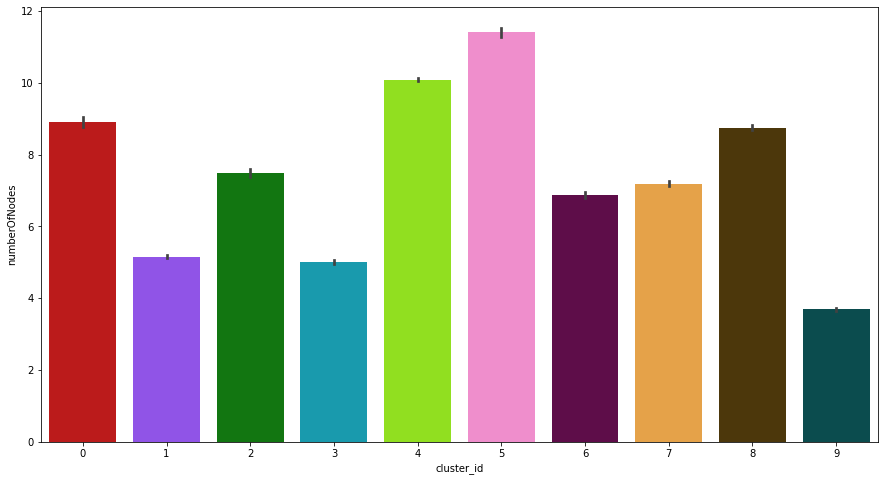

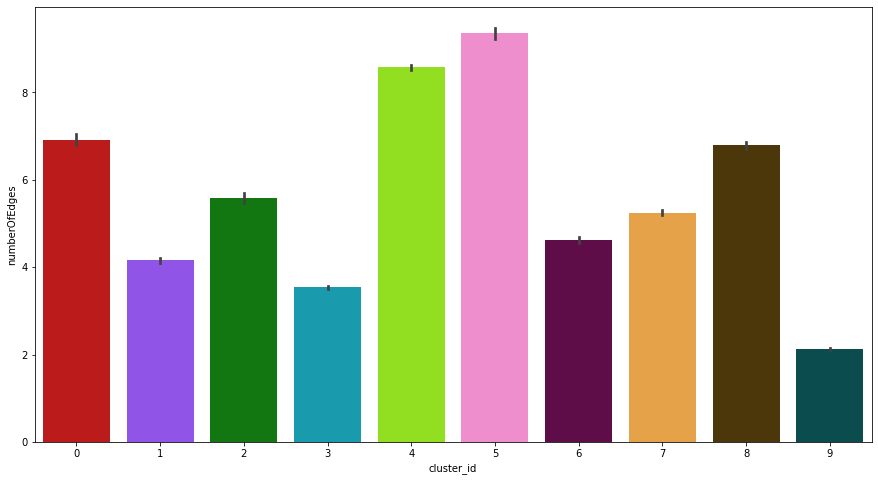

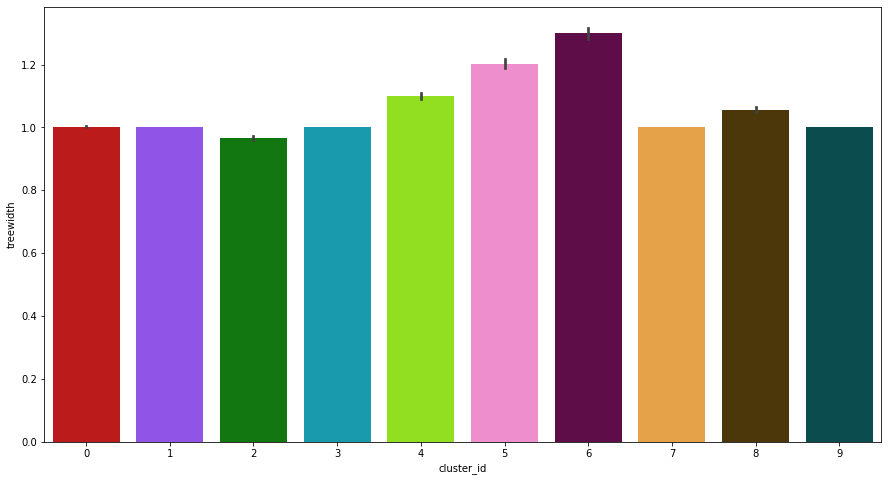

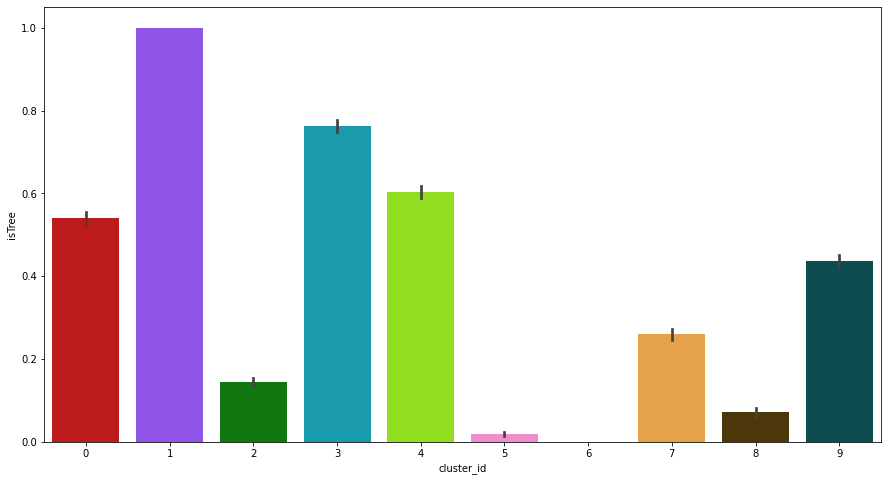

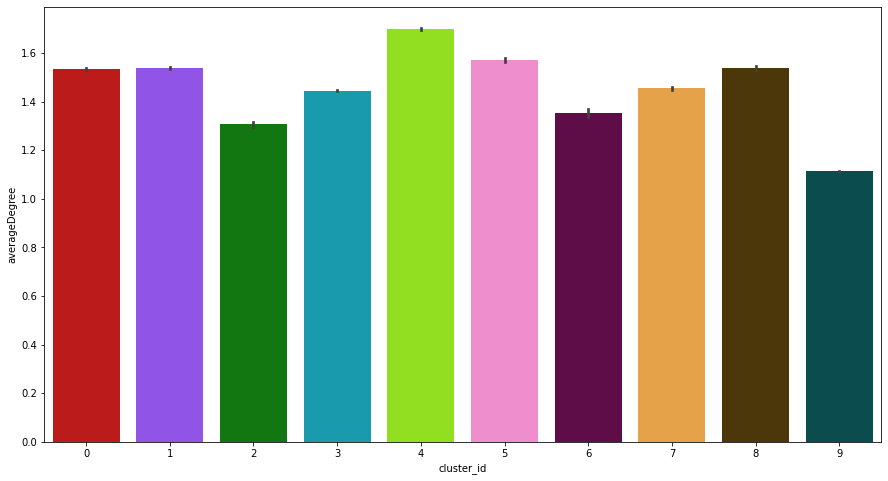

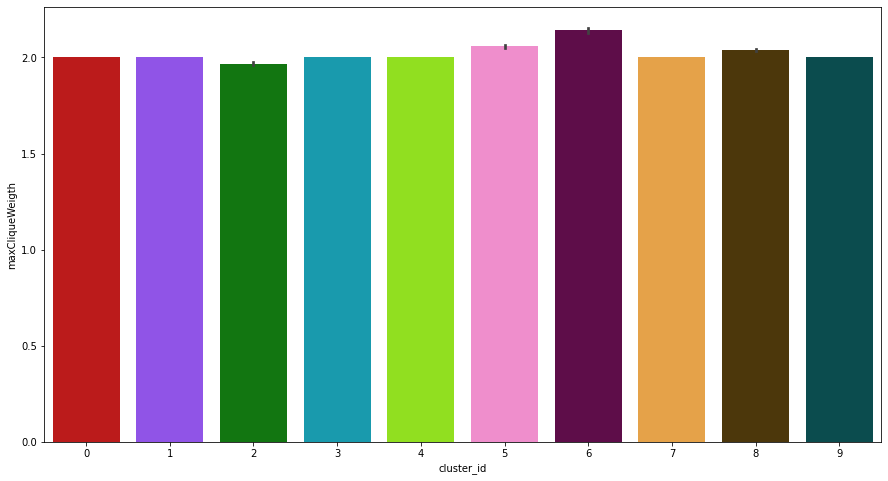

In [ ]:
for feature in features:
     plt.figure(figsize=(15,8))
#   #sns.boxplot(
     sns.barplot(
     x="cluster_id"
     , y=feature
     , data=df_sample_with_cluster
     , palette=palette
     #, whis=1000
     )
     plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=513ed372-d958-4618-b5dc-4b186f2555bd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>